In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 4)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit( x_train, y_train )

y_pred = knn.predict(x_test)
print(knn.score(x_test, y_test))

0.9736842105263158


In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv = 5, scoring = "accuracy")

print(scores.mean())

0.9733333333333334


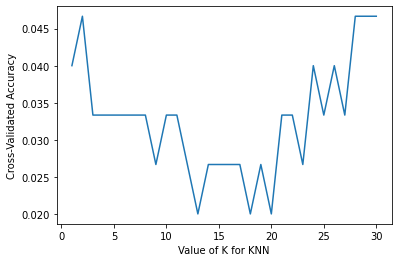

In [ ]:
import matplotlib.pyplot as plt

k_range = range(1, 31)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  #scores = cross_val_score(knn, x, y, cv = 10, scoring = "accuracy") # for classification
  loss = -cross_val_score(knn, x, y, cv = 10, scoring = "neg_mean_squared_error") # for regression
  #k_scores.append(scores.mean())
  k_scores.append(loss.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Cross-Validated Accuracy")
plt.show()

## OverFitting

In [ ]:
# sklearn 版本 0.20已經捨棄了learning_curve
#from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
digits = load_digits()
x = digits.data
y = digits.target

train_sizes, train_loss, test_loss = learning_curve(SVC(gamma = 0.001), x, y,
                                                    cv = 10, scoring = 'neg_mean_squared_error',
                                                    train_sizes = [0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

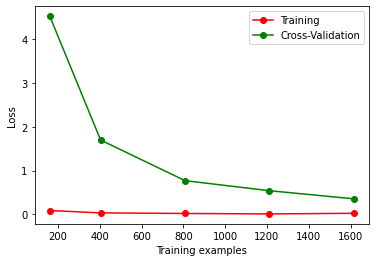

In [ ]:
plt.plot(train_sizes, train_loss_mean, 'o-', color = "r", label = "Training")
plt.plot(train_sizes, test_loss_mean, "o-", color = "g", label = "Cross-Validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

## 綜合

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
digits = load_digits()
x = digits.data
y = digits.target

param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(SVC(), x, y, param_name = 'gamma',
                                        param_range = param_range,
                                        cv = 10, scoring = 'neg_mean_squared_error',
                                        )
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

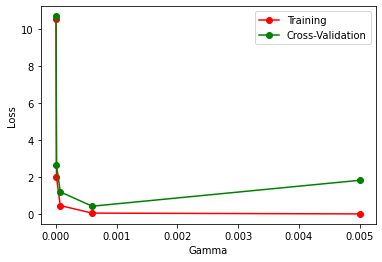

In [ ]:
plt.plot(param_range, train_loss_mean, 'o-', color = "r", label = "Training")
plt.plot(param_range, test_loss_mean, "o-", color = "g", label = "Cross-Validation")

plt.xlabel("Gamma")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()